In [10]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import utils # local file

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 17.0
plt.rc('text', usetex=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from network import build_network, plot_network

In [16]:
df = pd.read_csv('./2020_Problem_D_DATA/passingevents.csv')

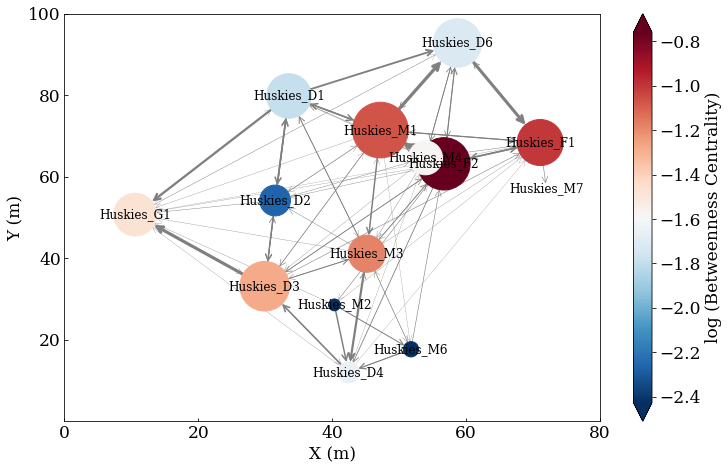

In [20]:
_ = plot_network(df, 'Huskies', matchid=2, font_family='serif', font_size=12)

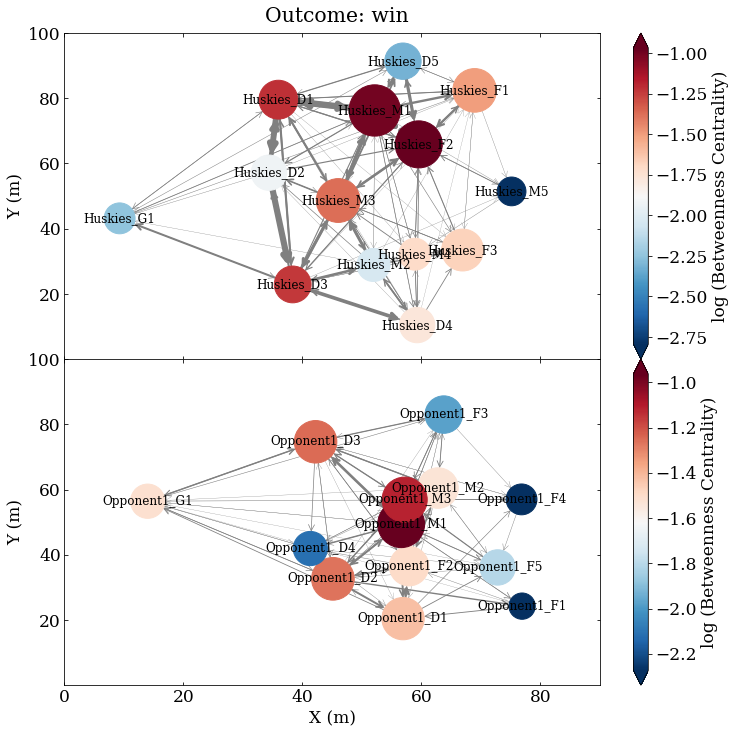

In [50]:
# Plot network for each match
df_matches = pd.read_csv('./2020_Problem_D_DATA/matches.csv')
game = df_matches.iloc[0]
matchid = game['MatchID']
oppo = game['OpponentID']

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
ax1 = plot_network(df, 'Huskies', matchid=matchid, ax=ax1, font_family='serif', font_size=12)
ax1.tick_params(direction='in', left=True, right=True, 
                bottom=True, top=True, labelleft=True, labelbottom=False)
ax1.set_xlim(0, 90)
ax2 = plot_network(df, oppo, matchid=matchid, ax=ax2, font_family='serif', font_size=12)
ax2.tick_params(direction='in', left=True, right=True, 
                bottom=True, top=True, labelleft=True, labelbottom=True)
ax2.set_xlim(0, 90)

plt.suptitle('Outcome: ' + game['Outcome'], x=0.44, y=0.91)

plt.subplots_adjust(hspace=0)
#plt.savefig('./Draft/match1-network.pdf', dpi=200, bbox_inches='tight')
#plt.savefig('./Draft/match1-network.png', dpi=200, bbox_inches='tight')

## Motifs of match 1 for Huskies

In [51]:
G, pos, centrality_dict, geometrical_dist, unidirection_pass, weight_dict = build_network(
    df, 'Huskies', 1)

In [79]:
from network import motifs_2, motifs_3, mcounter
motif_count, motif_weight = mcounter(G, motifs_3, weight_dict)

In [80]:
motif_count

{'S1': 4,
 'S2': 13,
 'S3': 43,
 'S4': 2,
 'S5': 11,
 'S6': 13,
 'S7': 19,
 'S8': 46,
 'S9': 0,
 'S10': 15,
 'S11': 9,
 'S12': 68,
 'S13': 45}

In [77]:
motif_count, motif_weight = mcounter(G, motifs_2, weight_dict)

In [78]:
motif_count, motif_weight

{'S1': 52, 'S2': 82}

In [130]:
motif_weight = pd.Series(motif_weight).sort_values()[::-1]
prominent_motif = motif_weight[motif_weight.values > np.median(motif_weight.values)]
#prominent_motif.sort_values()

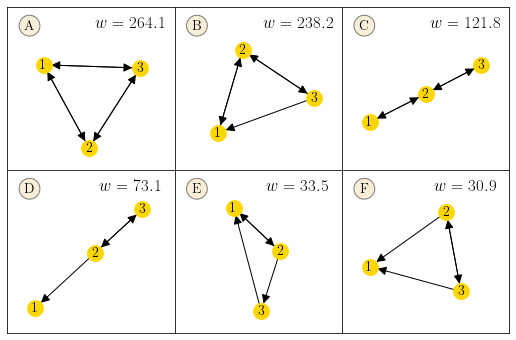

In [159]:
plt.rc('text', usetex=True)
fig, axes = plt.subplots(2, 3, figsize=(9, 6))

tag_set = ['A', 'B', 'C', 'D', 'E', 'F']
for ind, row in enumerate(prominent_motif.iteritems()):
    name = row[0]
    weight = row[1]
    ax = axes[ind // 3, ind % 3]
    ax.axis('on')
    nx.draw_networkx(motifs_3[name], pos=nx.spring_layout(motifs_3[name], center=np.array([0, -0.1])), 
                     ax=ax, 
                     node_size=250, 
                     node_color='gold',
                     font_size=14,
                     arrowsize=18)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.text(0.7, 1.2, r'$w={:.1f}$'.format(weight), 
            horizontalalignment='center', 
            verticalalignment='center')
    ax.text(-1.1, 1.15, tag_set[ind], 
            fontsize=14,
            horizontalalignment='center', 
            verticalalignment='center',
            bbox=dict(boxstyle='circle', facecolor='wheat', alpha=0.5))

plt.subplots_adjust(wspace=0, hspace=0)

#plt.savefig('./Draft/motif3-Huskies-match1.pdf', dpi=200, bbox_inches='tight')
#plt.savefig('./Draft/motif3-Huskies-match1.png', dpi=200, bbox_inches='tight')

## Structual parameters of each network

In [160]:
df = pd.read_csv('./2020_Problem_D_DATA/passingevents.csv')
df_matches = pd.read_csv('./2020_Problem_D_DATA/matches.csv')
df_matches[:3]

,MatchID,OpponentID,Outcome,OwnScore,OpponentScore,Side,CoachID
0,1,Opponent1,win,1,0,home,Coach1
1,2,Opponent2,tie,1,1,away,Coach1
2,3,Opponent3,loss,0,2,away,Coach1


In [161]:
from network import build_network, plot_network, calc_network_params

In [164]:
for ind, row in df_matches.iterrows():
    G, pos, centrality_dict, geometrical_dist, unidirection_pass, weight_dict = build_network(df, 
                                                                                              'Huskies', 
                                                                                              row['MatchID'])
    network_params = calc_network_params(G)
    df_matches.loc[ind, 'Huskies_network_params'] = str(network_params)
    
    G, pos, centrality_dict, geometrical_dist, unidirection_pass, weight_dict = build_network(df, 
                                                                                              row['OpponentID'], 
                                                                                              row['MatchID'])
    network_params = calc_network_params(G)
    df_matches.loc[ind, 'Opponent_network_params'] = str(network_params)

In [165]:
df_matches.to_csv('./matches_with_network_params.csv', index=True)